# Project - Counterfeit Medicines Sales Prediction

## Problem statement:

Counterfeit medicines are fake medicines which are either contaminated or contain wrong or no active
ingredient. They could have the right active ingredient but at the wrong dose. Counterfeit drugs are illegal and
are harmful to health. 10% of the world's medicine is counterfeit and the problem is even worse in developing
countries. Up to 30% of medicines in developing countries are counterfeit.

Millions of pills, bottles and sachets of counterfeit and illegal medicines are being traded across the world. The
World Health Organization (WHO) is working with International Criminal Police Organization (Interpol) to dislodge
the criminal networks raking in billions of dollars from this cynical trade.

Despite all these efforts, counterfeit medicine selling rackets don’t seem to stop popping here and there. It has
become a challenge to deploy resources to counter these; without spreading them too thin and eventually
rendering them ineffective. Government has decided that they should focus on illegal operations of high net
worth first instead of trying to control all of them. In order to do that they have collected data which will help them
to predict sales figures given an illegal operation's characteristics.


## Task:

Your task here is to build a predictive model for predicting sales figures given other information related to
counterfeit medicine selling operations. You need to build your model on the train dataset. Test dataset does not
have a response column; you need to predict those values and submit it in a csv format.



## Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 1. Load Data

In [2]:
cf_train = pd.read_csv('counterfeit_train.csv')
cf_test = pd.read_csv('counterfeit_test.csv')

# 2. Data Explorataion 

In [3]:
# shape of the datasets
print(cf_train.shape,  cf_test.shape)

(6818, 12) (1705, 11)


In [4]:
# Display first 5 rows of the train data 
cf_train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [5]:
# Display last 5 rows of the train data 
cf_train.tail()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
6813,OYN80,8.535,Area046,1995,204.1452,Hreplacements,mild,0.112963,DownTown,Tier 1,Small,2070.4520
6814,ACW12,20.650,Area046,1995,235.1088,Hreplacements,mild,0.131103,DownTown,Tier 1,Small,2126.3792
6815,OPM10,20.000,Area017,2005,193.6292,Antimalarial,critical,0.105096,DownTown,Tier 2,Unknown,2119.7212
6816,SLY12,10.180,Area045,2000,162.8682,Statins,mild,0.099957,DownTown,Tier 2,Unknown,1485.2138
6817,ATT10,7.930,Area018,2007,177.5500,Mstablizers,critical,0.117445,Industrial,Tier 3,Medium,1943.9500


In [6]:
# Display first 5 rows of the test data 
cf_test.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small


In [7]:
# Display last 5 rows of the test data
cf_test.tail()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
1700,KXW10,NaN,Area027,1983,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium
1701,CKE54,21.30,Area035,2002,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small
1702,HAY13,20.40,Area017,2005,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown
1703,ZEE32,20.00,Area018,2007,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium
1704,NDL93,8.08,Area045,2000,238.7694,Antibiotics,critical,0.098982,DownTown,Tier 2,Unknown


In [8]:
# saving medicine id column for final submission
med_id = cf_test['Medicine_ID']

In [9]:
# drop feature - 'Medicine_ID'
cf_train.drop(['Medicine_ID'], axis = 1 , inplace = True)
cf_test.drop(['Medicine_ID'], axis = 1 , inplace = True)

In [10]:
# display concise info of all varibales
cf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Counterfeit_Weight   5652 non-null   float64
 1   DistArea_ID          6818 non-null   object 
 2   Active_Since         6818 non-null   int64  
 3   Medicine_MRP         6818 non-null   float64
 4   Medicine_Type        6818 non-null   object 
 5   SidEffect_Level      6818 non-null   object 
 6   Availability_rating  6818 non-null   float64
 7   Area_Type            6818 non-null   object 
 8   Area_City_Type       6818 non-null   object 
 9   Area_dist_level      6818 non-null   object 
 10  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 586.0+ KB


In [11]:
# Display feature names of data set
cf_train.columns

Index(['Counterfeit_Weight', 'DistArea_ID', 'Active_Since', 'Medicine_MRP',
       'Medicine_Type', 'SidEffect_Level', 'Availability_rating', 'Area_Type',
       'Area_City_Type', 'Area_dist_level', 'Counterfeit_Sales'],
      dtype='object')

In [12]:
# exploring numeric features
numeric_features = cf_train.select_dtypes("number")
numeric_features.dtypes

Counterfeit_Weight     float64
Active_Since             int64
Medicine_MRP           float64
Availability_rating    float64
Counterfeit_Sales      float64
dtype: object

In [13]:
# exploring categorical fetaures
cat_features = cf_train.select_dtypes("object")
cat_features.dtypes

DistArea_ID        object
Medicine_Type      object
SidEffect_Level    object
Area_Type          object
Area_City_Type     object
Area_dist_level    object
dtype: object

## 2.1 Correlation 

In [14]:
# correlation matrix (ranges from 1 to -1)
corr = cf_train.corr().round(2)
corr

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
Counterfeit_Weight,1.00,-0.02,0.03,-0.02,0.01
Active_Since,-0.02,1.00,0.00,-0.08,-0.04
Medicine_MRP,0.03,0.00,1.00,-0.00,0.57
Availability_rating,-0.02,-0.08,-0.00,1.00,-0.12
Counterfeit_Sales,0.01,-0.04,0.57,-0.12,1.00


In [15]:
# display correlation of variables with target in descending order
print(corr['Counterfeit_Sales'].round(2).sort_values(ascending=False))

Counterfeit_Sales      1.00
Medicine_MRP           0.57
Counterfeit_Weight     0.01
Active_Since          -0.04
Availability_rating   -0.12
Name: Counterfeit_Sales, dtype: float64


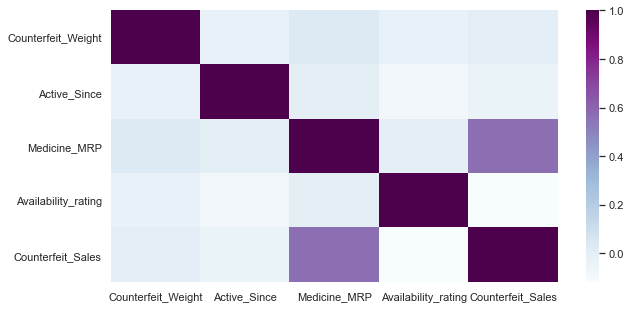

In [16]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (10,5))
sns.heatmap(corr, cmap ="BuPu")

## Observations:

* **Medicine_MRP** is the most correlated variable with response variable.

# 3. Data Preprocessing 

## 3.1 Combine Train & Test data

In [17]:
##  adding Counterfeit_Sales- column in test File & filing with  nan value
cf_test['Counterfeit_Sales']= np.nan

# adding identiier column 'data' to combine train & test set then separate later 
cf_train['data']= 'train'
cf_test['data']= 'test'

## keep the order of columns same in test data as train data
cf_test= cf_test[cf_train.columns]

## combining test & train file
cf_all= pd.concat([cf_train, cf_test], axis= 0)

In [18]:
# display the top 4 rows of combined data 
cf_all.head(4)

,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026,train
1,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,train
2,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920,train
3,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130,train


In [19]:
# display shapes  & count of rows of combined data
print(cf_all.shape)
print("--------------------")
print(cf_all.count())

(8523, 12)
--------------------
Counterfeit_Weight     7060
DistArea_ID            8523
Active_Since           8523
Medicine_MRP           8523
Medicine_Type          8523
SidEffect_Level        8523
Availability_rating    8523
Area_Type              8523
Area_City_Type         8523
Area_dist_level        8523
Counterfeit_Sales      6818
data                   8523
dtype: int64


In [20]:
# checking datatypes of all variables
cf_all.dtypes

Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
data                    object
dtype: object

In [21]:
## check the no. of unique values in each column
cf_all.nunique()

Counterfeit_Weight      415
DistArea_ID              10
Active_Since              9
Medicine_MRP           5970
Medicine_Type            16
SidEffect_Level           2
Availability_rating    7884
Area_Type                 4
Area_City_Type            3
Area_dist_level           4
Counterfeit_Sales      3142
data                      2
dtype: int64

## 3.2 Identifying Missing values

In [22]:
# check for presence of missing values 
cf_all.isnull().sum()

Counterfeit_Weight     1463
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales      1705
data                      0
dtype: int64

### Observations:
    
 *  Only **"Counterfeit_Weight"** variable has missing values, which needs to be imputed later.

## 3.3  Missing Value Imputation

In [23]:
# check descriptive statistics of 'Counterfeit_Weight'
cf_all['Counterfeit_Weight'].describe()

count    7060.000000
mean       14.157645
std         4.643456
min         5.855000
25%        10.073750
50%        13.900000
75%        18.150000
max        22.650000
Name: Counterfeit_Weight, dtype: float64

In [24]:
# imputing missing values with mean
cf_all['Counterfeit_Weight'] = cf_all['Counterfeit_Weight'].fillna(cf_all['Counterfeit_Weight'].mean())

In [25]:
# check if missing values got imputed
cf_all['Counterfeit_Weight'].isnull().sum()

0

## 3.4 Handling Categorical Data

In [26]:
#check the no. of unique values in categorical variables
for col in cf_all.select_dtypes(['object']).columns:
    print(col,':',cf_all[col].nunique()) 

DistArea_ID : 10
Medicine_Type : 16
SidEffect_Level : 2
Area_Type : 4
Area_City_Type : 3
Area_dist_level : 4
data : 2


###   Visualization of categorical data & their categories

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

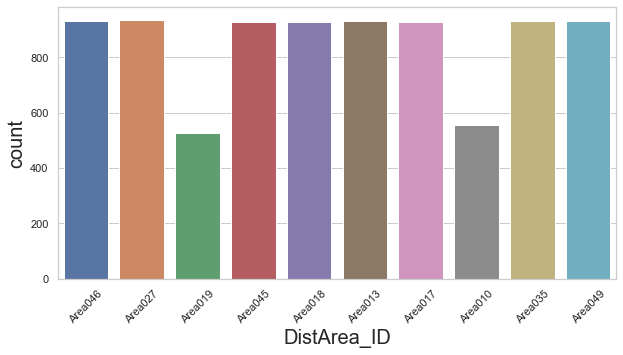

In [27]:
# DistArea_ID
plt.figure(figsize= (10,5))
sns.set_style("whitegrid")
sns.countplot(cf_all['DistArea_ID'])
plt.xlabel('DistArea_ID', size = 20)
plt.ylabel('count', size = 20)
plt.xticks(rotation= 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

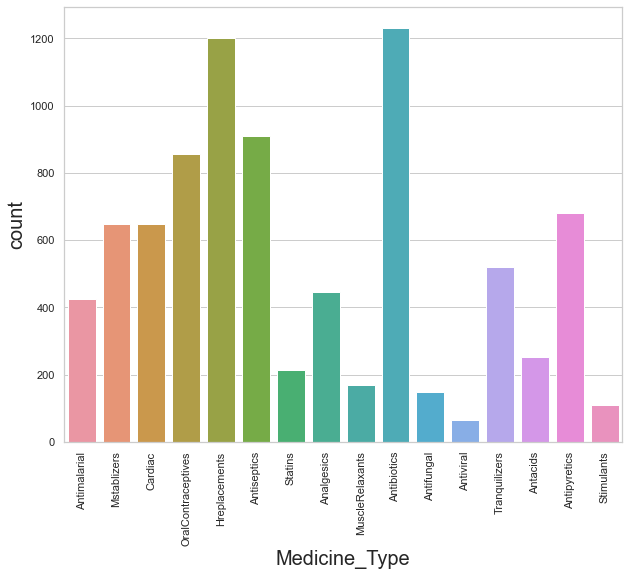

In [28]:
# Medicine_Type
plt.figure(figsize= (10,8))
sns.countplot(cf_all['Medicine_Type'])
plt.xlabel('Medicine_Type', size = 20)
plt.ylabel('count', size = 20)
plt.xticks(rotation= 90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

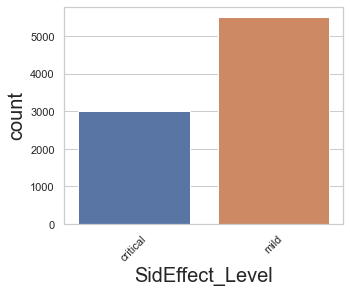

In [29]:
# SidEffect_Level
fig = plt.figure(figsize= (5,4))
sns.countplot(cf_all['SidEffect_Level'])
plt.xlabel('SidEffect_Level', size = 20)
plt.ylabel('count', size = 20)
plt.xticks(rotation= 45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

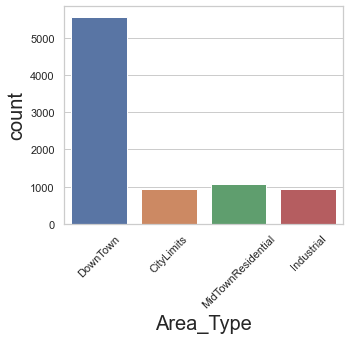

In [30]:
# Area_Type
plt.figure(figsize= (5,4))
sns.countplot(cf_all['Area_Type'])
plt.xlabel('Area_Type', size = 20)
plt.ylabel('count', size = 20)
plt.xticks(rotation= 45)

Text(0, 0.5, 'count')

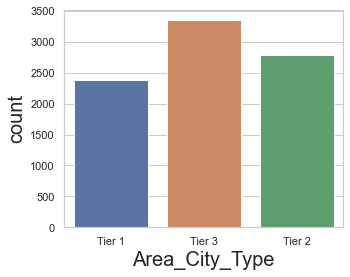

In [31]:
# Area_City_Type
fig = plt.figure(figsize= (5,4))
sns.countplot(cf_all['Area_City_Type'])
plt.xlabel('Area_City_Type', size = 20)
plt.ylabel('count', size = 20)

Text(0, 0.5, 'count')

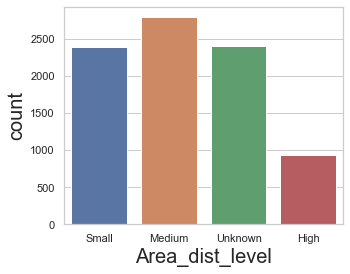

In [32]:
# Area_dist_level
fig = plt.figure(figsize= (5,4))
sns.countplot(cf_all['Area_dist_level'])
plt.xlabel('Area_dist_level', size = 20)
plt.ylabel('count', size = 20)

## 3.5 Feature Engineering

### a) Variable Transformation

In [33]:
## creating dummies for  categorical variables- #One Hot Coding:
for col in ['DistArea_ID','Medicine_Type','SidEffect_Level','Area_Type','Area_City_Type','Area_dist_level']:
    
    temp = pd.get_dummies(cf_all[col], prefix = col, drop_first = True)
    cf_all = pd.concat([temp,cf_all], axis = 1)
    cf_all.drop([col], axis = 1, inplace = True)

### b) Variable Creation

In [34]:
# Create new feature  'total years of operation from  'Active_Since'
cf_all['Operation_yrs'] = 2020 - cf_all['Active_Since']

In [35]:
# drop original column 'Active_since
cf_all.drop(['Active_Since'], axis = 1, inplace = True)

In [36]:
# display top 5 rows of the data 
cf_all.head()

,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,SidEffect_Level_mild,Medicine_Type_Antacids,...,DistArea_ID_Area035,DistArea_ID_Area045,DistArea_ID_Area046,DistArea_ID_Area049,Counterfeit_Weight,Medicine_MRP,Availability_rating,Counterfeit_Sales,data,Operation_yrs
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,13.100000,160.2366,0.070422,1775.5026,train,25
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,14.157645,110.4384,0.013000,3069.1520,train,37
2,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,9.025000,259.4092,0.060783,2603.0920,train,25
3,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,11.800000,99.9830,0.065555,1101.7130,train,25
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,14.157645,56.4402,0.248859,158.9402,train,37


## 3.6 Feature Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['Counterfeit_Weight', 'Medicine_MRP', 'Availability_rating', 'Operation_yrs']
cf_all[columns_to_scale] = scaler.fit_transform(cf_all[columns_to_scale])

In [38]:
# check top 5 rows of the data after feature scaling
cf_all.head()

,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,SidEffect_Level_mild,Medicine_Type_Antacids,...,DistArea_ID_Area035,DistArea_ID_Area045,DistArea_ID_Area046,DistArea_ID_Area049,Counterfeit_Weight,Medicine_MRP,Availability_rating,Counterfeit_Sales,data,Operation_yrs
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0.431378,0.503597,0.174857,1775.5026,train,0.5
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0.494352,0.292228,0.000000,3069.1520,train,1.0
2,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0.188747,0.924536,0.145506,2603.0920,train,0.5
3,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0.353974,0.247850,0.160039,1101.7130,train,0.5
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0.494352,0.063032,0.718227,158.9402,train,1.0


## 3.7 Separate train & test data 

In [39]:
# separate train & test data before model building
cf_train= cf_all[cf_all['data']== 'train' ]
cf_train.drop(['data' ],1, inplace = True)

cf_test= cf_all[cf_all['data']== 'test' ]
cf_test.drop(['Counterfeit_Sales','data'],1, inplace = True)

In [40]:
# delete the combined dataset
del cf_all

In [41]:
# check the dimesions of train & test set 
print(cf_train.shape, cf_test.shape) 

(6818, 38) (1705, 37)


## 3.8 Train - Valdation  Split for cross validation

In [42]:
# define features & target
X = cf_train.drop(['Counterfeit_Sales'], axis = 1)
y = cf_train['Counterfeit_Sales']

In [43]:
from sklearn.model_selection import train_test_split
# train-validation split in 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.2,random_state = 13) 

In [44]:
# check dimesions of train & validation data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5454, 37) (5454,)
(1364, 37) (1364,)


# 4. Model Building

## 4.1 Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor
# initialize the decision tree regressor
dtree = DecisionTreeRegressor()

In [46]:
# train the model 
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [47]:
# generate predictions on validation  subset
dt_pred = dtree.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [49]:
# evaluating the performance of model
mae = mean_absolute_error(y_test, dt_pred)
mse = mean_squared_error(y_test, dt_pred)
rmse= np.sqrt(mean_squared_error(y_test, dt_pred))

In [50]:
results = pd.DataFrame([['Decision Tree', mae, mse,rmse]],
                            columns = ['Models','MAE','MSE','RMSE'])
results

,Models,MAE,MSE,RMSE
0,Decision Tree,1037.665896,2.205149e+06,1484.974283


## 4.2 Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor
# initialise the Random forest regressor
rf = RandomForestRegressor()

In [52]:
# train & fit the model 
rf.fit(X_train,y_train)

RandomForestRegressor()

In [53]:
# generate predictions on validation  subset
pred_rf = rf.predict(X_test)

Text(0, 0.5, 'Predicted Values')

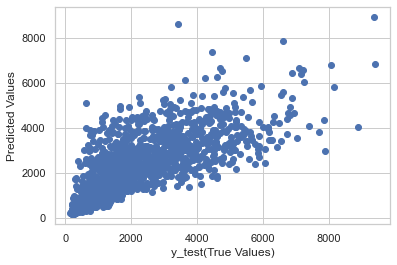

In [54]:
# visualizing - predicted v/s true values.
plt.scatter(y_test, pred_rf)
plt.xlabel('y_test(True Values)') 
plt.ylabel('Predicted Values')

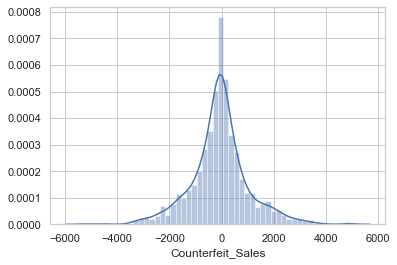

In [55]:
# checking distribution of results
sns.distplot(y_test - pred_rf)

# Feature_importance

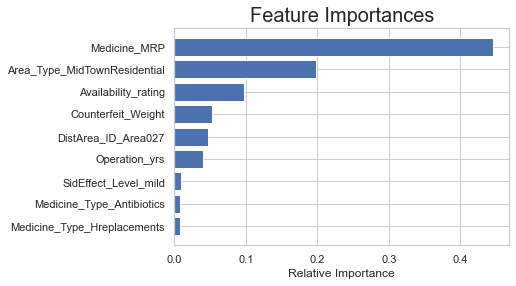

In [56]:
# sorting variables on the basis of feature importance
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances', size = 20)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [57]:
# evaluating model performance
mae = mean_absolute_error(y_test, pred_rf)
mse = mean_squared_error(y_test, pred_rf)
rmse= np.sqrt(mean_squared_error(y_test, pred_rf))

In [58]:
rf_results = pd.DataFrame([['Random Forest', mae, mse,rmse]],
                            columns = ['Models','MAE','MSE','RMSE'])

results = results.append(rf_results, ignore_index = True )
results

,Models,MAE,MSE,RMSE
0,Decision Tree,1037.665896,2.205149e+06,1484.974283
1,Random Forest,764.529827,1.199487e+06,1095.211150


## 4.3 XGBoost

In [59]:
from xgboost.sklearn import XGBRegressor as xgb
# initialize  the model 
xg_reg = xgb()

In [60]:
# train & fit  the model
xg_reg.fit(X_train, y_train)

[18:54:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [61]:
# make prediction on validation set
pred_xgb = xg_reg.predict(X_test)

Text(0, 0.5, 'Predicted Values')

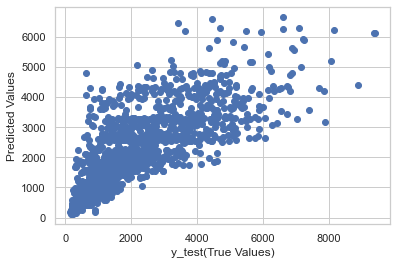

In [62]:
# visualizing - predicted v/s true values
plt.scatter(y_test, pred_xgb)
plt.xlabel('y_test(True Values)') 
plt.ylabel('Predicted Values')

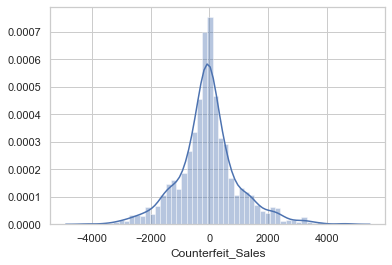

In [63]:
# distribution of results
sns.distplot(y_test - pred_xgb)

In [64]:
# evaluating the performance of model
mae = mean_absolute_error(y_test, pred_xgb)
mse = mean_squared_error(y_test, pred_xgb)
rmse= np.sqrt(mean_squared_error(y_test, pred_xgb))

In [65]:
# creating dataframe with model performance results
xgb_results = pd.DataFrame([['XG-Boost', mae, mse,rmse]],
                            columns = ['Models','MAE','MSE','RMSE'])

results = results.append(xgb_results, ignore_index = True )
results

,Models,MAE,MSE,RMSE
0,Decision Tree,1037.665896,2.205149e+06,1484.974283
1,Random Forest,764.529827,1.199487e+06,1095.211150
2,XG-Boost,733.312702,1.088126e+06,1043.133009


## Obseravations:

* XGBoost proves to be the best model amongst all, as it has the lowest MAE, MSE & RMSE.

## Hyper-parameter Tuning

In [66]:
# set the parameters
xgb_params = {"n_estimators": [25, 50, 100, 150, 200],
             "gamma": [0, 2, 5, 8, 10],
             "max_depth": [2, 3, 4, 5, 6, 7, 8],
             "min_child_weight": [0.5, 2, 5, 7, 10]
             }

In [67]:
# initiate the xgboost regressor
xgb1 = xgb()

In [69]:
from sklearn.model_selection import RandomizedSearchCV
# Randomised search cv 
random_search = RandomizedSearchCV(xgb1,
                                   param_distributions = xgb_params,
                                   n_iter = 20,
                                   cv = 5,
                                   scoring = "neg_mean_absolute_error",
                                   n_jobs = -1,
                                   verbose = False
)

In [70]:
# Fit randomized search
best_model = random_search.fit(X_train, y_train)

[19:06:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [71]:
# # View best hyperparameters
random_search.best_estimator_

XGBRegressor(gamma=2, max_depth=4, min_child_weight=2, n_estimators=25)

In [72]:
# generate predictions on validation set
final_preds = best_model.predict(X_test)
final_preds

array([2648.6345, 2992.4744,  779.6165, ..., 1639.5531, 1639.5531,
       3885.9275], dtype=float32)

In [73]:
# evaluating the performance of model
mae = mean_absolute_error(y_test, final_preds)
mse = mean_squared_error(y_test,final_preds)
rmse= np.sqrt(mean_squared_error(y_test, final_preds))

In [74]:
# creating dataframe with model performance results
xgb1_results = pd.DataFrame([['XG-Boost(with HyperParams)', mae, mse,rmse]],
                            columns = ['Models','MAE','MSE','RMSE'])

results = results.append(xgb1_results, ignore_index = True )
results

,Models,MAE,MSE,RMSE
0,Decision Tree,1037.665896,2.205149e+06,1484.974283
1,Random Forest,764.529827,1.199487e+06,1095.211150
2,XG-Boost,733.312702,1.088126e+06,1043.133009
3,XG-Boost(with HyperParams),726.304669,1.084418e+06,1041.353747


# 5. Model Building  on entire Train data & predict on Test set

In [75]:
X_new = cf_train.drop(['Counterfeit_Sales'],axis = 1)
y_new = cf_train['Counterfeit_Sales']

In [76]:
# instantiate the model with best parameters
xgb_final = xgb(gamma=2, max_depth=4, min_child_weight=2, n_estimators=25)

In [77]:
# train & fit the model 
xgb_final.fit(X_new,y_new)

[19:14:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(gamma=2, max_depth=4, min_child_weight=2, n_estimators=25)

In [78]:
# prediction on test data 
test_pred = xgb_final.predict(cf_test) 

In [79]:
## submission dataframe with Medicine_ID & Sales Price
xgb_preds = pd.DataFrame()
xgb_preds['Medicine_ID'] = med_id
xgb_preds["Counterfeit_Sales"] = test_pred
xgb_preds

,Medicine_ID,Counterfeit_Sales
0,HLZ81,2132.546143
1,ECE94,3785.938721
2,SAD14,1390.097656
3,EQV63,373.023102
4,AIR10,343.495697
...,...,...
1700,KXW10,3060.960693
1701,CKE54,801.045898
1702,HAY13,2809.726074
1703,ZEE32,3498.959717


In [80]:
# Export prediction data & submit.
xgb_preds.to_csv("Counterfeit_Medicines_Sales_Prediction.csv", index=False)

# --------------------End of  the project----------------------------